<a href="https://colab.research.google.com/github/EricCostaDev/ai-algorithms/blob/main/CW_2_final_version/CW_2_EC%26SI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install  pyswarms
!pip install mealpy
!pip install -U pymoo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 KB 6.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.3/383.3 KB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.4/20.4 MB 61.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 KB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 KB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 KB 21.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210096 sha256=fad2a3f1

In [ ]:
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import plot_cost_history
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [ ]:
all_methods_all_functions_results = []

In [ ]:
table_values = [
    {
        'griewank': {
            'PSO': {'max': 0, 'min':0,'mean':0,'median':0,'std':0},
            'GWO': {'max': 0, 'min':0,'mean':0,'median':0,'std':0},
            'ACO': {'max': 0, 'min':0,'mean':0,'median':0,'std':0},
            'DE': {'max': 0, 'min':0,'mean':0,'median':0,'std':0},
            'GA': {'max': 0, 'min':0,'mean':0,'median':0,'std':0},
            'MA': {'max': 0, 'min':0,'mean':0,'median':0,'std':0}
        }
    },
    {
        'zakharov': {
            'PSO': {'max': 0, 'min':0,'mean':0,'median':0,'std':0},
            'GWO': {'max': 0, 'min':0,'mean':0,'median':0,'std':0},
            'ACO': {'max': 0, 'min':0,'mean':0,'median':0,'std':0},
            'DE': {'max': 0, 'min':0,'mean':0,'median':0,'std':0},
            'GA': {'max': 0, 'min':0,'mean':0,'median':0,'std':0},
            'MA': {'max': 0, 'min':0,'mean':0,'median':0,'std':0}
        }
    }
]

In [ ]:
  # table_values[0]['griewank'][method]['min'] = min_value
  # table_values[0]['griewank'][method]['max'] = max_value
  # table_values[0]['griewank'][method]['mean'] = mean_value
  # table_values[0]['griewank'][method]['median'] = median_value
  # table_values[0]['griewank'][method]['std'] = std

  # table_values[1]['zakharov'][method]['min'] = min_value
  # table_values[1]['zakharov'][method]['max'] = max_value
  # table_values[1]['zakharov'][method]['mean'] = mean_value
  # table_values[1]['zakharov'][method]['median'] = median_value
  # table_values[1]['zakharov'][method]['std'] = std

# **Griewank function**

In [ ]:
def griewank(x):
  
    part1 = 1.0
    part2 = 0.0

    for i in range(x.shape[1]):
        part1 *= np.cos(x[:, i] / np.sqrt(i + 1))
        part2 += x[:, i] ** 2 / 4000

    # print('griewank',part2 - part1 + 1)
    return part2 - part1 + 1

In [ ]:
def griewank_2d(x):
    part1 = 1.0
    part2 = 0.0
    
    x = np.array(x)  # Convert to numpy array
    
    for i in range(x.shape[0]):  # Use x.shape[0] instead of x.shape[1]
        part1 *= np.cos(x[i] / np.sqrt(i + 1))
        part2 += x[i] ** 2 / 4000
        
    return 1.0 / (part2 - part1 + 1)

**The function graph**

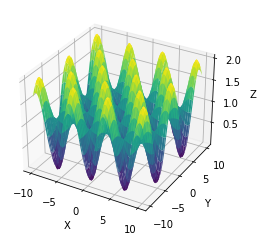

In [ ]:
# Create a meshgrid of x and y values
X, Y = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))

# Evaluate the function at each point on the grid
Z = griewank(np.array([X.flatten(), Y.flatten()]).T).reshape(X.shape)

# Create a 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [ ]:
def show_convergence_graph(global_bests,pso = False):

    # print('min','global_bests:', global_bests)

    global_bests_array = global_bests

    if (pso == False):
      global_bests_array = [[sublist[1][0] for sublist in lst] for lst in global_bests]

    # print('global_bests_array:', global_bests_array)
    
    min_global_bests = np.min(global_bests_array,axis = 0)
    max_global_bests = np.max(global_bests_array,axis = 0)
    mean_global_bests = np.mean(global_bests_array,axis = 0)

    # print('min',min_global_bests)
    # print('max',max_global_bests)
    # print('mean',mean_global_bests)

    # Plot the convergence graph

    plt.plot(mean_global_bests, label='Mean')
    plt.plot(min_global_bests, label='Min')
    plt.plot(max_global_bests, label='Max')
    plt.legend()
    plt.title('Convergence Graph')
    plt.xlabel('Iteration')
    plt.xscale('log')
    plt.ylabel('Fitness')
    plt.show()

In [ ]:
def getStats(data):
  
  min_value = np.min(data)
  max_value = np.max(data)
  mean_value = np.mean(data)
  median_value = np.median(data)
  std_value = np.std(data)

  result_list = [min_value,max_value,mean_value,median_value,std_value]

  return result_list

## **Swarm intelligence algorithms**

### **Optimizing using PSO**

2023-02-26 04:31:32,354 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0
2023-02-26 04:31:40,007 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0, best pos: [6.90939179e-09 1.11378794e-08]
2023-02-26 04:31:40,018 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0
2023-02-26 04:31:50,131 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0, best pos: [2.37043778e-09 5.09304366e-09]
2023-02-26 04:31:50,159 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0
2023-02-26 04:32:02,075 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0, best pos: [-6.83027228e-09  

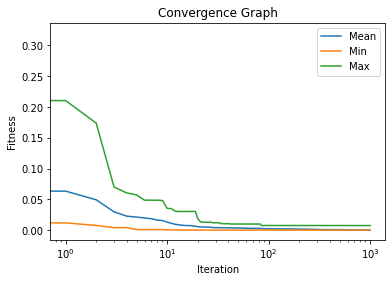

In [ ]:
# Set-up hyperparameters
options = {
    'c1': 0.5, 
    'c2': 0.3, 
    'w': 0.9
    }

lb = -10
ub = 10
n_pop = 40
problem_dim = 2

# Set-up optimizer

grienwank_PSO_results = []
global_bests_results = []

for i in range(30):
  initial_solutions = np.random.uniform(low=lb, high=ub, size=(n_pop, problem_dim))
  optimizer = ps.single.GlobalBestPSO(n_particles=40, 
                                      dimensions=2, 
                                      options=options,
                                      init_pos = initial_solutions
                                      )
  cost, pos = optimizer.optimize(griewank, iters=1000)
  grienwank_PSO_results.append(cost)
  global_bests_results.append(optimizer.cost_history)

stats_results = getStats(grienwank_PSO_results)

table_values[0]['griewank']['PSO']['min'] = stats_results[0]
table_values[0]['griewank']['PSO']['max'] = stats_results[1]
table_values[0]['griewank']['PSO']['mean'] = stats_results[2]
table_values[0]['griewank']['PSO']['median'] = stats_results[3]
table_values[0]['griewank']['PSO']['std'] = stats_results[4]

all_methods_all_functions_results.append(stats_results)

show_convergence_graph(global_bests_results,True)

### **Optimizing using Grey Wolf Optimization (GWO)**

In [ ]:
from mealpy.swarm_based.GWO import OriginalGWO

2023-02-26 04:33:48,835 - numexpr.utils - INFO - NumExpr defaulting to 2 threads.


You can access to the history of agent/population in model.history object with variables:
list_global_best: List of global best SOLUTION found so far in all previous generations

list_current_best: List of current best SOLUTION in each previous generations

list_global_worst: List of global worst SOLUTION found so far in all previous generations

list_current_worst: List of current worst SOLUTION in each previous generations

list_epoch_time: List of runtime for each generation

list_global_best_fit: List of global best FITNESS found so far in all previous generations

list_current_best_fit: List of current best FITNESS in each previous generations

list_diversity: List of DIVERSITY of swarm in all generations

list_exploitation: List of EXPLOITATION percentages for all generations

list_exploration: List of EXPLORATION percentages for all generations

list_population: List of POPULATION in each generations

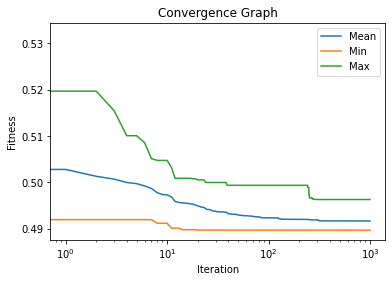

In [ ]:
# Define the lower and upper bounds for the input variables
lb = np.array([-10, -10])
ub = np.array([10, 10])
n_pop = 30
n_iterations = 1000



# Set up the GWO optimizer

optimizer = OriginalGWO(n_iterations, n_pop)

# Define the dictionary containing the optimization problem
problem_dict = {
    "fit_func": griewank_2d,
    "lb": lb,
    "ub": ub,
    "minmax": "min",
     "log_to": None,
      # "save_population": True,  
}


problem_dim = np.shape(lb)[0]
grienwank_GWO_results = []
global_bests_results = []

for i in range(30):
  initial_solutions = np.random.uniform(low=lb, high=ub, size=(n_pop, problem_dim))
  best_position, best_fitness = optimizer.solve(problem_dict,starting_positions = initial_solutions,mode="thread", n_workers=6)
  global_bests = optimizer.history.list_global_best
  grienwank_GWO_results.append(best_fitness)
  global_bests_results.append(global_bests)


stats_results = getStats(grienwank_GWO_results)
all_methods_all_functions_results.append(stats_results)

table_values[0]['griewank']['GWO']['min'] = stats_results[0]
table_values[0]['griewank']['GWO']['max'] = stats_results[1]
table_values[0]['griewank']['GWO']['mean'] = stats_results[2]
table_values[0]['griewank']['GWO']['median'] = stats_results[3]
table_values[0]['griewank']['GWO']['std'] = stats_results[4]


show_convergence_graph(global_bests_results)


# best_position, best_fitness, optimization_history = optimizer.solve(problem_dict, return_optim_history=True)

# print("Best position:", best_position)
# print("Best fitness:", best_fitness)

# global_bests[999][1][0]



### **Optimizing using Ant Colony Optimization (ACO)**

Solution: [ 9.45278771 -8.93445548], Fitness: 0.48988142639721677


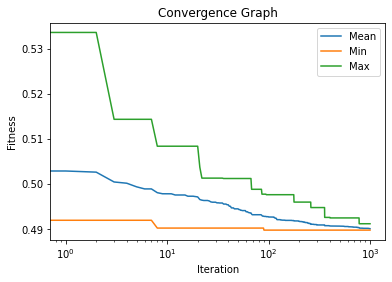

In [ ]:
from mealpy.swarm_based.ACOR import OriginalACOR


lb = np.array([-10, -10])
ub = np.array([10, 10])

problem_dict = {
    "fit_func": griewank_2d,
    "lb": lb,
    "ub": ub,
    "minmax": "min",
     "log_to": None, #console
}

epoch = 1000
pop_size = 50
sample_count = 25
intent_factor = 0.5
zeta = 1.0


optimizer = OriginalACOR(epoch, pop_size, sample_count, intent_factor, zeta)

problem_dim = np.shape(lb)[0]
griewank_2d_ACO_results = []
global_bests_results = []

for i in range(30):
  initial_solutions = np.random.uniform(low=lb, high=ub, size=(pop_size, problem_dim))
  best_position, best_fitness = optimizer.solve(problem_dict,starting_positions = initial_solutions,mode="thread", n_workers=6)
  global_bests = optimizer.history.list_global_best
  griewank_2d_ACO_results.append(best_fitness)
  global_bests_results.append(global_bests)


stats_results = getStats(griewank_2d_ACO_results)
all_methods_all_functions_results.append(stats_results)

table_values[0]['griewank']['ACO']['min'] = stats_results[0]
table_values[0]['griewank']['ACO']['max'] = stats_results[1]
table_values[0]['griewank']['ACO']['mean'] = stats_results[2]
table_values[0]['griewank']['ACO']['median'] = stats_results[3]
table_values[0]['griewank']['ACO']['std'] = stats_results[4]

best_position, best_fitness = optimizer.solve(problem_dict)

print(f"Solution: {best_position}, Fitness: {best_fitness}")

show_convergence_graph(global_bests_results,False)

## **Evolutionary Computing Algorithms**

### **Differential Evolution (DE)**

Solution: [-600. -600.], Fitness: 0.005555183523355586


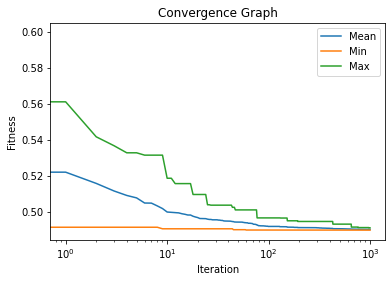

In [ ]:
import numpy as np
from mealpy.evolutionary_based.DE import BaseDE

lb = np.array([-600, -600])
ub = np.array([600, 600])

problem_dict1 = {
    "fit_func": griewank_2d,
    "lb": lb,
    "ub": ub,
    "minmax": "min",
    "log_to": None,
}

epoch = 1000
pop_size = 50
wf = 0.7
cr = 0.9
strategy = 0

problem_dim = np.shape(lb)[0]
initial_solutions = np.random.uniform(low=lb, high=ub, size=(pop_size, problem_dim))

model = BaseDE(epoch, pop_size, wf, cr, strategy)

problem_dim = np.shape(lb)[0]
griewank_2d_DE_results = []
global_bests_results = []

for i in range(30):
  initial_solutions = np.random.uniform(low=lb, high=ub, size=(pop_size, problem_dim))
  best_position, best_fitness = optimizer.solve(problem_dict,starting_positions = initial_solutions,mode="thread", n_workers=6)
  global_bests = optimizer.history.list_global_best
  griewank_2d_DE_results.append(best_fitness)
  global_bests_results.append(global_bests)

stats_results = getStats(griewank_2d_DE_results)
all_methods_all_functions_results.append(stats_results)

table_values[0]['griewank']['DE']['min'] = stats_results[0]
table_values[0]['griewank']['DE']['max'] = stats_results[1]
table_values[0]['griewank']['DE']['mean'] = stats_results[2]
table_values[0]['griewank']['DE']['median'] = stats_results[3]
table_values[0]['griewank']['DE']['std'] = stats_results[4]

best_position, best_fitness = model.solve(problem_dict1)
print(f"Solution: {best_position}, Fitness: {best_fitness}")

show_convergence_graph(global_bests_results,False)

### **Genetic Algorithm (GA)**

Solution: [-596.99686132 -599.99033935], Fitness: 0.0055223013830631405


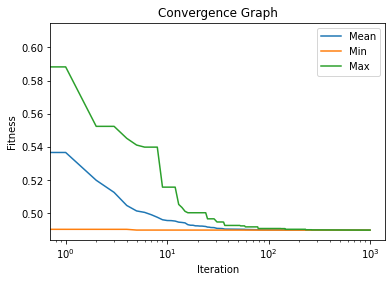

In [ ]:
import numpy as np
from mealpy.evolutionary_based.GA import BaseGA

lb = np.array([-600, -600])
ub = np.array([600, 600])

problem_dict1 = {
    "fit_func": griewank_2d,
    "lb": lb,
    "ub": ub,
    "minmax": "min",
    "log_to": None,
}

epoch = 1000
pop_size = 50
pc = 0.9
pm = 0.05


model1 = BaseGA(epoch, pop_size, pc, pm)
# model2 = BaseGA(epoch, pop_size, pc, pm, selection="tournament", k_way=0.4, crossover="multi_points")
# model3 = BaseGA(epoch, pop_size, pc, pm, crossover="one_point", mutation="swap")
# model4 = BaseGA(epoch, pop_size, pc, pm, crossover="arithmetic", mutation_multipoints=True, mutation="swap")
# model5 = BaseGA(epoch, pop_size, pc, pm, selection="roulette", crossover="multi_points")
# model6 = BaseGA(epoch, pop_size, pc, pm, selection="random", mutation="inversion")
# model7 = BaseGA(epoch, pop_size, pc, pm, crossover="arithmetic", mutation="flip")

problem_dim = np.shape(lb)[0]
griewank_2d_GA_results = []
global_bests_results = []

for i in range(30):
  initial_solutions = np.random.uniform(low=lb, high=ub, size=(pop_size, problem_dim))
  best_position, best_fitness = model1.solve(problem_dict,starting_positions = initial_solutions,mode="thread", n_workers=6)
  global_bests = model1.history.list_global_best
  griewank_2d_GA_results.append(best_fitness)
  global_bests_results.append(global_bests)


stats_results = getStats(griewank_2d_GA_results)
all_methods_all_functions_results.append(stats_results)

table_values[0]['griewank']['GA']['min'] = stats_results[0]
table_values[0]['griewank']['GA']['max'] = stats_results[1]
table_values[0]['griewank']['GA']['mean'] = stats_results[2]
table_values[0]['griewank']['GA']['median'] = stats_results[3]
table_values[0]['griewank']['GA']['std'] = stats_results[4]

best_position, best_fitness = model1.solve(problem_dict1)
print(f"Solution: {best_position}, Fitness: {best_fitness}")
show_convergence_graph(global_bests_results,False)



### **Memetic Algorithm (MA)**

Solution: [-600. -600.], Fitness: 0.005555183523355586


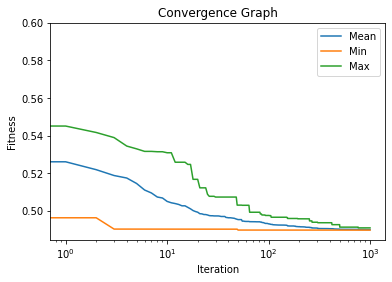

In [ ]:
#MA griewank

import numpy as np
from mealpy.evolutionary_based.MA import OriginalMA

def fitness_function(solution):
    return np.sum(solution**2)
    
lb = np.array([-600, -600])
ub = np.array([600, 600])

problem_dict1 = {
    "fit_func": griewank_2d,
    "lb": lb,
    "ub": ub,
    "minmax": "min",
    "log_to": None,
}

epoch = 1000
pop_size = 50
pc = 0.85
pm = 0.15
p_local = 0.5
max_local_gens = 10
bits_per_param = 4



model = OriginalMA(epoch, pop_size, pc, pm, p_local, max_local_gens, bits_per_param)

problem_dim = np.shape(lb)[0]
grienwank_MA_results = []
global_bests_results = []

for i in range(30):
  initial_solutions = np.random.uniform(low=lb, high=ub, size=(pop_size, problem_dim))
  best_position, best_fitness = optimizer.solve(problem_dict,starting_positions = initial_solutions,mode="thread", n_workers=6)
  global_bests = optimizer.history.list_global_best
  grienwank_MA_results.append(best_fitness)
  global_bests_results.append(global_bests)

stats_results = getStats(grienwank_MA_results)
all_methods_all_functions_results.append(stats_results)

table_values[0]['griewank']['MA']['min'] = stats_results[0]
table_values[0]['griewank']['MA']['max'] = stats_results[1]
table_values[0]['griewank']['MA']['mean'] = stats_results[2]
table_values[0]['griewank']['MA']['median'] = stats_results[3]
table_values[0]['griewank']['MA']['std'] = stats_results[4]

best_position, best_fitness = model.solve(problem_dict1)
print(f"Solution: {best_position}, Fitness: {best_fitness}")

show_convergence_graph(global_bests_results,False)

# **Zakharov function**

In [ ]:
def zakharov_old(x):
    """Zakharov function implementation."""
    term1 = x[:, 0]**2 + x[:, 1]**2
    term2 = 0.5 * x[:, 0] + x[:, 1]
    term3 = 0.5 * x[:, 0] + x[:, 1]**2
    return term1 + term2**2 + term3**4

In [ ]:
def zakharov_1d(x):
    n = 1
    term1 = x**2
    term2 = (0.5 * np.arange(1, n+1) * x)**2
    term3 = (0.5 * np.arange(1, n+1) * x)**4
    return term1 + term2 + term3

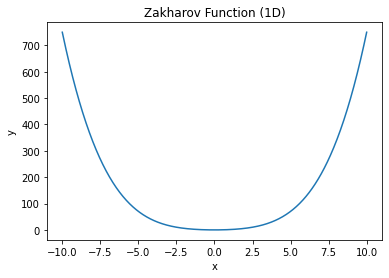

In [ ]:
x = np.linspace(-10, 10, 1000)
y = zakharov_1d(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Zakharov Function (1D)')
plt.show()

In [ ]:
def zakharov(x):
    x = np.atleast_2d(x)
    n = x.shape[1]
    term1 = np.sum(x**2, axis=1)
    term2 = np.sum(0.5 * np.arange(1, n+1) * x, axis=1)**2
    term3 = np.sum(0.5 * np.arange(1, n+1) * x, axis=1)**4
    return term1 + term2 + term3

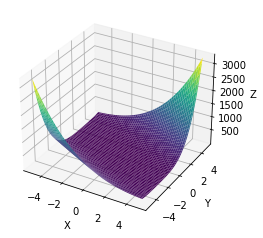

In [ ]:
# Create a meshgrid of x and y values
X, Y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))

# Evaluate the function at each point on the grid
Z = zakharov(np.array([X.flatten(), Y.flatten()]).T).reshape(X.shape)

# Create a 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

zakha  ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_calc_pareto_front', '_calc_pareto_set', '_evaluate', '_evaluate_elementwise', '_evaluate_vectorized', '_format_dict', 'bounds', 'callback', 'data', 'do', 'elementwise', 'elementwise_func', 'elementwise_runner', 'evaluate', 'exclude_from_serialization', 'has_bounds', 'has_constraints', 'ideal_point', 'n_constr', 'n_eq_constr', 'n_ieq_constr', 'n_obj', 'n_var', 'nadir_point', 'name', 'pareto_front', 'pareto_set', 'replace_nan_values_by', 'strict', 'vars', 'vtype', 'xl', 'xu']


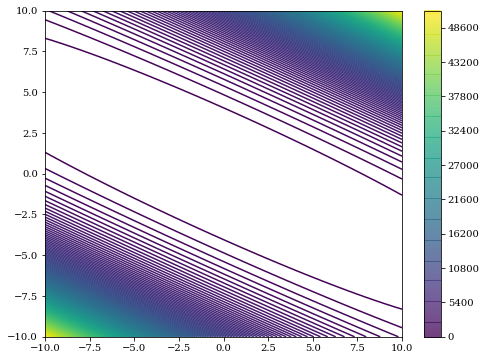

In [ ]:
import numpy as np

from pymoo.problems import get_problem
from pymoo.visualization.fitness_landscape import FitnessLandscape

problem = get_problem("zakharov", n_var=2)

print('zakha ',dir(problem))

# FitnessLandscape(problem, angle=(45, 45), _type="surface").show()
FitnessLandscape(problem, _type="contour", contour_levels = 200, colorbar=True).show()

## **Swarm intelligence algorithms**

### **Optimizing using PSO**

2023-02-26 05:05:51,647 - pyswarms.single.global_best - INFO - Optimize for 400 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|400/400, best_cost=1.9e-21
2023-02-26 05:05:53,241 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.8992436782895514e-21, best pos: [-8.62920415e-12 -2.79713615e-11]
2023-02-26 05:05:53,252 - pyswarms.single.global_best - INFO - Optimize for 400 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|400/400, best_cost=7.84e-21
2023-02-26 05:05:54,479 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 7.837581083907707e-21, best pos: [ 8.23555639e-11 -1.04071103e-11]
2023-02-26 05:05:54,489 - pyswarms.single.global_best - INFO - Optimize for 400 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|400/400, best_cost=5.58e-22
2023-02-26 05:05:55,908 - pyswarms.single.global_best - INFO - Optimization fin

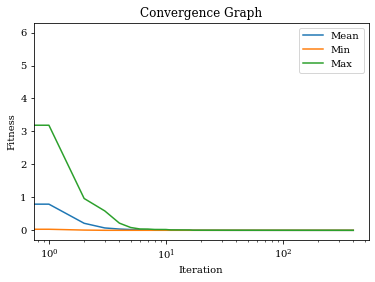

In [ ]:
# Set-up hyperparameters
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

lb = -10
ub = 10
n_pop = 160
problem_dim = 2

# Set-up optimizer

zakharov_PSO_results = []
global_bests_results = []


for i in range(30):
  initial_solutions = np.random.uniform(low=lb, high=ub, size=(n_pop, problem_dim))
  optimizer = ps.single.GlobalBestPSO(n_particles=160, 
                                      dimensions=2, 
                                      options=options,
                                      init_pos = initial_solutions
                                      )
  cost, pos = optimizer.optimize(zakharov, iters=400)
  zakharov_PSO_results.append(cost)
  global_bests_results.append(optimizer.cost_history)

stats_results = getStats(zakharov_PSO_results)
table_values[1]['zakharov']['PSO']['min'] = stats_results[0]
table_values[1]['zakharov']['PSO']['max'] = stats_results[1]
table_values[1]['zakharov']['PSO']['mean'] = stats_results[2]
table_values[1]['zakharov']['PSO']['median'] = stats_results[3]
table_values[1]['zakharov']['PSO']['std'] = stats_results[4]

all_methods_all_functions_results.append(stats_results)

show_convergence_graph(global_bests_results,True)




### **Optimizing using Ant Colony Optimization (ACO)**

Solution: [ 4.57681806e-63 -2.88642256e-63], Fitness: 2.963631886317889e-125


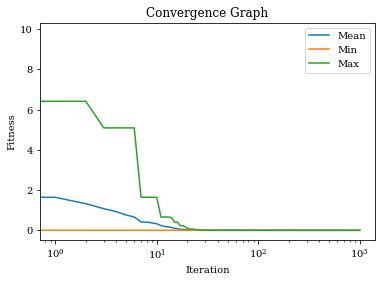

In [ ]:
# ACO

import numpy as np
from mealpy.swarm_based.ACOR import OriginalACOR


# Define the problem
lb = np.array([-10, -10])
ub = np.array([10, 10])
problem_dict = {
    "fit_func": zakharov,
    "lb": lb,
    "ub": ub,
    "minmax": "min",
    "log_to": None # console
}



# Define the ACO algorithm
epoch = 1000
pop_size = 50
sample_count = 25
intent_factor = 0.5
zeta = 1.0

problem_dim = np.shape(lb)[0]
initial_solutions = np.random.uniform(low=lb, high=ub, size=(pop_size, problem_dim))

optimizer = OriginalACOR(epoch, pop_size, sample_count, intent_factor, zeta)

problem_dim = np.shape(lb)[0]
zakharov_ACO_results = []
global_bests_results = []

for i in range(30):
  initial_solutions = np.random.uniform(low=lb, high=ub, size=(pop_size, problem_dim))
  best_position, best_fitness = optimizer.solve(problem_dict,starting_positions = initial_solutions,mode="thread", n_workers=6)
  global_bests = optimizer.history.list_global_best
  zakharov_ACO_results.append(best_fitness)
  global_bests_results.append(global_bests)

# Print the results
print(f"Solution: {best_position}, Fitness: {best_fitness}")

stats_results = getStats(zakharov_ACO_results)

table_values[1]['zakharov']['ACO']['min'] = stats_results[0]
table_values[1]['zakharov']['ACO']['max'] = stats_results[1]
table_values[1]['zakharov']['ACO']['mean'] = stats_results[2]
table_values[1]['zakharov']['ACO']['median'] = stats_results[3]
table_values[1]['zakharov']['ACO']['std'] = stats_results[4]

all_methods_all_functions_results.append(stats_results)

show_convergence_graph(global_bests_results,False)

### **Optimizing using Grey Wolf Optimization (GWO)**

Best position: [ 8.05168968e-144 -6.37075127e-144]
Best fitness: 1.1091476474303648e-286


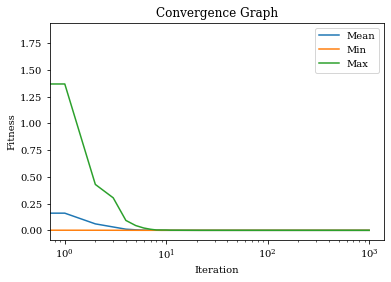

In [ ]:
# GWO

from mealpy.swarm_based.GWO import OriginalGWO

n_pop = 30
lb = np.array([-5, -5])
ub = np.array([5, 5])
n_iterations = 1000

# Set up the GWO optimizer
optimizer = OriginalGWO(n_iterations, n_pop)

# Define the dictionary containing the optimization problem
problem_dict = {
    "fit_func": zakharov,
    "lb": lb,
    "ub": ub,
    "minmax": "min",
    "log_to": None,
}


problem_dim = np.shape(lb)[0]
zakharov_GWO_results = []
global_bests_results = []

for i in range(30):
  initial_solutions = np.random.uniform(low=lb, high=ub, size=(n_pop, problem_dim))
  best_position, best_fitness = optimizer.solve(problem_dict,starting_positions = initial_solutions,mode="thread", n_workers=6)
  global_bests = optimizer.history.list_global_best
  zakharov_GWO_results.append(best_fitness)
  global_bests_results.append(global_bests)


# Solve the optimization problem
best_position, best_fitness = optimizer.solve(problem_dict)

print("Best position:", best_position)
print("Best fitness:", best_fitness)

stats_results = getStats(zakharov_GWO_results)

table_values[1]['zakharov']['GWO']['min'] = stats_results[0]
table_values[1]['zakharov']['GWO']['max'] = stats_results[1]
table_values[1]['zakharov']['GWO']['mean'] = stats_results[2]
table_values[1]['zakharov']['GWO']['median'] = stats_results[3]
table_values[1]['zakharov']['GWO']['std'] = stats_results[4]

all_methods_all_functions_results.append(stats_results)

show_convergence_graph(global_bests_results,False)

## **Evolutionary Computing Algorithms**

### **Differential Evolution (DE)**

In [ ]:
def get_report_values(values_list):
    mean_values = np.mean(values_list, axis=0)
    max_values = np.max(values_list, axis=0)
    min_values = np.min(values_list, axis=0)
    return mean_values, max_values, min_values

def check_convergence(values, threshold=1e-3):
    for i in range(1, len(values)):
        if abs(values[i] - values[i-1]) > threshold:
            return False
    return True

Solution: [-5.24865770e-163 -1.96742337e-163], Fitness: 0.0


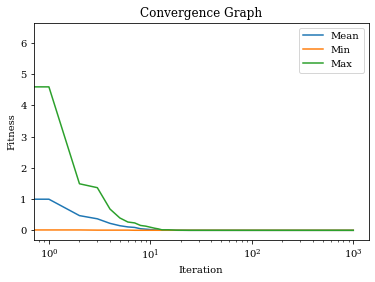

In [ ]:
# DE

import numpy as np
from mealpy.evolutionary_based.DE import BaseDE

lb = np.array([-10, -10])
ub = np.array([10, 10])

problem_dict1 = {
    "fit_func": zakharov,
    "lb": lb,
    "ub": ub,
    "minmax": "min",
    "log_to": None,
}

epoch = 1000
pop_size = 50
wf = 0.7
cr = 0.9
strategy = 0
model = BaseDE(epoch, pop_size, wf, cr, strategy)

problem_dim = np.shape(lb)[0]
zakharov_DE_results = []
global_bests_results = []

for i in range(30):
  initial_solutions = np.random.uniform(low=lb, high=ub, size=(pop_size, problem_dim))
  best_position, best_fitness = model.solve(problem_dict,starting_positions = initial_solutions,mode="thread", n_workers=6)
  global_bests = model.history.list_global_best
  zakharov_DE_results.append(best_fitness)
  global_bests_results.append(global_bests)

zakharov_DE_stats_results = getStats(zakharov_DE_results)


best_position, best_fitness = model.solve(problem_dict1)


print(f"Solution: {best_position}, Fitness: {best_fitness}")


stats_results = getStats(zakharov_DE_results)

table_values[1]['zakharov']['DE']['min'] = stats_results[0]
table_values[1]['zakharov']['DE']['max'] = stats_results[1]
table_values[1]['zakharov']['DE']['mean'] = stats_results[2]
table_values[1]['zakharov']['DE']['median'] = stats_results[3]
table_values[1]['zakharov']['DE']['std'] = stats_results[4]

all_methods_all_functions_results.append(stats_results)

show_convergence_graph(global_bests_results,False)

In [ ]:
print(f"global_bests: {global_bests[999][1][0]}")

global_bests: 7.920065820702246e-173


### **Genetic Algorithm (GA)**

/usr/local/lib/python3.8/dist-packages/mealpy/optimizer.py:324: RuntimeWarning: invalid value encountered in true_divide
  self.history.list_exploration = 100 * (np.array(self.history.list_diversity) / div_max)


Solution: [ 0.00090515 -0.00104995], Fitness: 2.2785374075771743e-06


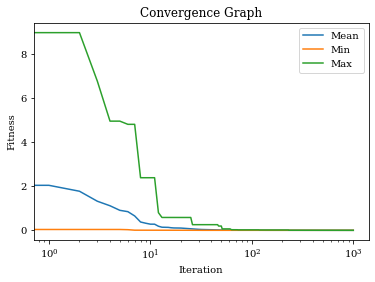

In [ ]:
# GA 

import numpy as np
from mealpy.evolutionary_based.GA import BaseGA

lb = np.array([-10, -10])
ub = np.array([10, 10])

problem_dict1 = {
    "fit_func": zakharov,
    "lb": lb,
    "ub": ub,
    "minmax": "min",
    "log_to": None,
}

epoch = 1000
pop_size = 50
pc = 0.9
pm = 0.05

problem_dim = np.shape(lb)[0]
initial_solutions = np.random.uniform(low=lb, high=ub, size=(pop_size, problem_dim))

model1 = BaseGA(epoch, pop_size, pc, pm)
# model2 = BaseGA(epoch, pop_size, pc, pm, selection="tournament", k_way=0.4, crossover="multi_points")
# model3 = BaseGA(epoch, pop_size, pc, pm, crossover="one_point", mutation="swap")
# model4 = BaseGA(epoch, pop_size, pc, pm, crossover="arithmetic", mutation_multipoints=True, mutation="swap")
# model5 = BaseGA(epoch, pop_size, pc, pm, selection="roulette", crossover="multi_points")
# model6 = BaseGA(epoch, pop_size, pc, pm, selection="random", mutation="inversion")
# model7 = BaseGA(epoch, pop_size, pc, pm, crossover="arithmetic", mutation="flip")

problem_dim = np.shape(lb)[0]
zakharov_GA_results = []
global_bests_results = []

for i in range(30):
  initial_solutions = np.random.uniform(low=lb, high=ub, size=(pop_size, problem_dim))
  best_position, best_fitness = model1.solve(problem_dict,starting_positions = initial_solutions,mode="thread", n_workers=6)
  global_bests = model1.history.list_global_best
  zakharov_GA_results.append(best_fitness)
  global_bests_results.append(global_bests)

best_position, best_fitness = model1.solve(problem_dict1)
print(f"Solution: {best_position}, Fitness: {best_fitness}")


stats_results = getStats(zakharov_GA_results)

table_values[1]['zakharov']['GA']['min'] = stats_results[0]
table_values[1]['zakharov']['GA']['max'] = stats_results[1]
table_values[1]['zakharov']['GA']['mean'] = stats_results[2]
table_values[1]['zakharov']['GA']['median'] = stats_results[3]
table_values[1]['zakharov']['GA']['std'] = stats_results[4]
all_methods_all_functions_results.append(stats_results)

show_convergence_graph(global_bests_results,False)



### **Memetic Algorithm (MA)**

Solution: [-0.33333333  0.33333333], Fitness: 0.2507716049382716


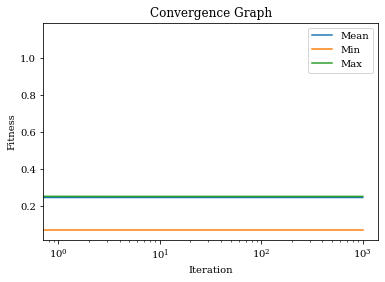

In [ ]:
import numpy as np
from mealpy.evolutionary_based.MA import OriginalMA

    
lb = np.array([-10, -10])
ub = np.array([10, 10])

problem_dict1 = {
    "fit_func": zakharov,
    "lb": lb,
    "ub": ub,
    "minmax": "min",
    "log_to": None,
}

epoch = 1000
pop_size = 50
pc = 0.85
pm = 0.15
p_local = 0.5
max_local_gens = 10
bits_per_param = 4

model = OriginalMA(epoch, pop_size, pc, pm, p_local, max_local_gens, bits_per_param)

problem_dim = np.shape(lb)[0]
zakharov_MA_results = []
global_bests_results = []

for i in range(30):
  initial_solutions = np.random.uniform(low=lb, high=ub, size=(pop_size, problem_dim))
  best_position, best_fitness = model.solve(problem_dict,starting_positions = initial_solutions,mode="thread", n_workers=6)
  global_bests = model.history.list_global_best
  zakharov_MA_results.append(best_fitness)
  global_bests_results.append(global_bests)


best_position, best_fitness = model.solve(problem_dict1)


print(f"Solution: {best_position}, Fitness: {best_fitness}")


stats_results = getStats(zakharov_MA_results)

table_values[1]['zakharov']['MA']['min'] = stats_results[0]
table_values[1]['zakharov']['MA']['max'] = stats_results[1]
table_values[1]['zakharov']['MA']['mean'] = stats_results[2]
table_values[1]['zakharov']['MA']['median'] = stats_results[3]
table_values[1]['zakharov']['MA']['std'] = stats_results[4]

all_methods_all_functions_results.append(stats_results)

show_convergence_graph(global_bests_results,False)

Mostrar resultados (alterar isso aqui só coloquei de exemplo)

In [ ]:
import pandas as pd

function_names = ['griewank', 'zakharov']
methods = ['PSO', 'GWO', 'ACO','DE','GA','MA']
metrics = ['max', 'min', 'mean', 'median','std']

data = []
for function in table_values:
    for func_name, func_data in function.items():
        for method in methods:
            row = [func_name, method]
            for metric in metrics:
                if isinstance(func_data[method], list):
                    row.append(func_data[method][0][metric])
                else:
                    row.append(func_data[method][metric])
            data.append(row)

df = pd.DataFrame(data, columns=['Function', 'Method', 'Max', 'Min', 'Mean', 'Median','STD'])

display(df.style.set_caption("Comparison of Optimization Methods on Test Functions").set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#f2f2f2'), ('color', '#333'), ('font-weight', 'bold')]},
    {'selector': 'td', 'props': [('text-align', 'center'), ('font-size', '14px')]}
]))

,Function,Method,Max,Min,Mean,Median,STD
0,griewank,PSO,0.007396,0.000000,0.000247,0.000000,0.001328
1,griewank,GWO,0.496324,0.489722,0.491696,0.489722,0.002438
2,griewank,ACO,0.491151,0.489735,0.490048,0.489910,0.000350
3,griewank,DE,0.490980,0.489722,0.490111,0.489955,0.000377
4,griewank,GA,0.489724,0.489722,0.489722,0.489722,0.000001
5,griewank,MA,0.490920,0.489725,0.490004,0.489901,0.000296
6,zakharov,PSO,0.000000,0.000000,0.000000,0.000000,0.000000
7,zakharov,GWO,0.000000,0.000000,0.000000,0.000000,0.000000
8,zakharov,ACO,0.000000,0.000000,0.000000,0.000000,0.000000
9,zakharov,DE,0.000000,0.000000,0.000000,0.000000,0.000000


Testing

In [ ]:
print('all_methods_all_functions_results',all_methods_all_functions_results)

all_methods_all_functions_results [[0.0, 0.007396040334114895, 0.000246534677886967, 0.0, 0.0013276298706319904], [0.4897215559164839, 0.4963236605446526, 0.49169585774385144, 0.4897223816830099, 0.0024381774025039526], [0.4897349137510477, 0.4911507302655592, 0.49004767526196197, 0.4899098671251062, 0.00035034641960212184], [0.4897215558071767, 0.49098009986631014, 0.4901111742722597, 0.48995452513264637, 0.00037650126425937166], [0.489721599258382, 0.4897242990193597, 0.4897224682953174, 0.4897222615261267, 8.596633630614122e-07], [0.4897253539348496, 0.4909203937786228, 0.4900042170913506, 0.48990073025203384, 0.0002963581263458957], [8.746687692531587e-24, 4.530988971722491e-20, 8.01681824995411e-21, 4.803633609223111e-21, 9.947714955456922e-21], [1.5293308949477902e-128, 2.9760645421446065e-119, 1.8432568637309548e-120, 1.7272284254159323e-123, 5.9184681162456976e-120], [4.3124723894731986e-169, 1.0649747738958774e-140, 4.627556329616558e-142, 9.746424753766514e-153, 1.96825075645

In [ ]:
import numpy as np
from scipy.stats import wilcoxon

mean_list = [sublist[2] for sublist in all_methods_all_functions_results]
print('mean_list' ,mean_list)

grienwank_list = mean_list[:6]

print('grienwank_list' ,grienwank_list)

zakharov_list = mean_list[6:12]

print('zakharov_list' ,zakharov_list)

# Perform the Wilcoxon signed-rank test
stat, p = wilcoxon(grienwank_list)

# Print the results
print("Wilcoxon signed-rank test for grienwank")
print("Statistical test:", stat)
print("p-value:", p)
if p < 0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")


# Perform the Wilcoxon signed-rank test
stat_2, p_2 = wilcoxon(zakharov_list)

# Print the results
print("Wilcoxon signed-rank test for zakharov")
print("Statistical test:", stat_2)
print("p-value:", p_2)
if p_2 < 0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

mean_list [0.000246534677886967, 0.49169585774385144, 0.49004767526196197, 0.4901111742722597, 0.4897224682953174, 0.4900042170913506, 8.01681824995411e-21, 1.8432568637309548e-120, 4.627556329616558e-142, 3.8637336253232035e-170, 3.823507471303318e-05, 1.5441221450185344e-121, 9.657417917124754e-138, 4.747546022535114e-171, 3.265343254682037e-05, 0.24462975258754552]
grienwank_list [0.000246534677886967, 0.49169585774385144, 0.49004767526196197, 0.4901111742722597, 0.4897224682953174, 0.4900042170913506]
zakharov_list [8.01681824995411e-21, 1.8432568637309548e-120, 4.627556329616558e-142, 3.8637336253232035e-170, 3.823507471303318e-05, 1.5441221450185344e-121]
Wilcoxon signed-rank test for grienwank
Statistical test: 0.0
p-value: 0.03125
Reject null hypothesis
Wilcoxon signed-rank test for zakharov
Statistical test: 0.0
p-value: 0.03125
Reject null hypothesis


In [ ]:
import numpy as np
from scipy import stats

# Assume the results are stored in a list of lists with the following format:
# results = [[f1_m1_min, f1_m1_max, f1_m1_mean, f1_m1_median, f1_m1_std], ..., [f2_m6_min, f2_m6_max, f2_m6_mean, f2_m6_median, f2_m6_std]]

results = all_methods_all_functions_results

# Define functions and methods
functions = ['griewank_2d', 'zakharov']
methods = ['PSO', 'GWO', 'ACO', 'DE', 'GA', 'MA']

# Reshape the results list into a 6x2 matrix
results_matrix = np.reshape(results, (2, 6, 5))

# Initialize arrays for storing results of wilcoxon test
p_values = np.zeros((len(methods), len(methods)))
statistics = np.zeros((len(methods), len(methods)))

# Iterate over methods and perform Wilcoxon tests
for i in range(len(methods)):
    method1 = methods[i]
    f1 = results_matrix[i]
    for j in range(len(methods)):
        method2 = methods[j]
        f2 = results_matrix[j]
        
        # Check if f1 and f2 are lists
        if isinstance(f1, list) and isinstance(f2, list):
            diff = [a-b for a, b in zip(f1, f2)]
            statistic, p_value = stats.wilcoxon(diff)
            statistics[i][j] = statistic
            p_values[i][j] = p_value
        else:
            print("Error: f1 and/or f2 is not a list")
            break

# Print results
print("Wilcoxon test p-values:")
print(p_values)
print("Wilcoxon test statistics:")
print(statistics)


ValueError: ignored